# sociability analysis

The goal of this notebook is to take in csv output files from the tracking softwear Anymaze and preform analysis of behavioral data. This notebook aims to create a pipeline for analyzing data collected during my project investigating social prefrence (eg socialbility) and novelty prefrence (social memory).

write code to run t-test
calculate summary stats
plot data in a bar graph
plot lines for each data point

In [225]:
import pandas as pd
from scipy.stats import ttest_ind
from pathlib import Path
import glob
import os
import matplotlib.pyplot as plt
import numpy as np

**glob.glob(): This function is used to search for files matching a specified pattern.**
*r"D:\Sequioa\anymaze_data\cage*.csv": **This argument represents the file pattern to search for.**
*r: **It indicates that the string should be treated as a raw string, which means that backslashes are treated as literal characters.**
*"D:\Sequioa\anymaze_data\cage*.csv": **This is the directory path followed by the file pattern.***

In [298]:
# Set the path to the folder containing your Excel files
folder_path = glob.glob(r"D:\Sequioa\anymaze_data\cage*.csv")

In [299]:
folder_path

['D:\\Sequioa\\anymaze_data\\cage_1_soc_day_1_3.csv',
 'D:\\Sequioa\\anymaze_data\\cage_2_soc_day_2_4.csv']

In [300]:
soc = []  
# Loop through each file
for file in folder_path:
    # Read the Excel file
    df = pd.read_csv(file)
# Loop through each file and rename columns 
    for columns in df.columns:
        if 'time investigating' in columns:
            print(columns)
            df = df.rename(columns = {columns: "_".join(columns.split(" ")[0:2]).lower()})
    soc.append(df)    


Social Agent Left : time investigating (s)
Empty Cup Right : time investigating (s)
Social Agent on the Right : time investigating (s)
Empty Cup Left : time investigating (s)


In [301]:
soc

[   Test Animal Animal notes Segment of test  social_agent  empty_cup  \
 0     1  1.1.1     Familiar   0 - 300 secs.          68.2       35.9   
 1     2  1.2.1     Familiar   0 - 300 secs.          79.4       18.0   
 2     3  1.3.1     Cagemate   0 - 300 secs.          23.4       11.5   
 3     4  1.1.3     Cagemate   0 - 300 secs.          49.4       50.8   
 4     5  1.2.3     Cagemate   0 - 300 secs.          20.3       90.9   
 5     6  1.4.3     Familiar   0 - 300 secs.          56.1       48.7   
 6     7  1.4.1     Cagemate   0 - 300 secs.          30.7       54.1   
 7     8  1.3.3     Familiar   0 - 300 secs.          39.3       51.1   
 
    Whole-Chamber : time (s)  Whole Chamber Social Agent : time (s)  \
 0                     256.5                                  107.4   
 1                     240.7                                  136.5   
 2                     277.5                                  115.0   
 3                     218.3                             

In [302]:
# Concatenate the DataFrames and reset the index
soc = pd.concat(soc, ignore_index=True) 

#soc_cagemate = soc[soc['Animal Notes'] == 'cagemate']
#i want a new dataframe that is the old dataframe new_df = old_df[filter]
#but i want my old df with a filter old_df[old_df[column_of_interest] == what_youu_want]
#filter = old_df[column_of_interest] == what_youu_want

In [303]:
soc

,Test,Animal,Animal notes,Segment of test,social_agent,empty_cup,Whole-Chamber : time (s),Whole Chamber Social Agent : time (s),Whole Chamber Empty Cup : time (s),Social Agent Chamber : time (s),Empty Cup Chamber : time (s)
0,1,1.1.1,Familiar,0 - 300 secs.,68.2,35.9,256.5,107.4,97.8,NaN,NaN
1,2,1.2.1,Familiar,0 - 300 secs.,79.4,18.0,240.7,136.5,60.0,NaN,NaN
2,3,1.3.1,Cagemate,0 - 300 secs.,23.4,11.5,277.5,115.0,49.5,NaN,NaN
3,4,1.1.3,Cagemate,0 - 300 secs.,49.4,50.8,218.3,70.1,111.1,NaN,NaN
4,5,1.2.3,Cagemate,0 - 300 secs.,20.3,90.9,166.0,48.0,141.0,NaN,NaN
5,6,1.4.3,Familiar,0 - 300 secs.,56.1,48.7,195.2,78.2,106.9,NaN,NaN
6,7,1.4.1,Cagemate,0 - 300 secs.,30.7,54.1,237.6,61.9,158.2,NaN,NaN
7,8,1.3.3,Familiar,0 - 300 secs.,39.3,51.1,247.3,58.2,127.4,NaN,NaN
8,1,2.1.2,Cagemate,0 - 300 secs.,84.8,37.4,52.9,NaN,NaN,210.7,88.5
9,2,2.3.2,Familiar,0 - 300 secs.,129.4,0.0,31.1,NaN,NaN,254.5,14.3


In [304]:
# Initialize an empty list to store t-test results
t_test_results = [] 
#Perform t-test comparing columns E and F
t_stat, p_value = ttest_ind(soc['social_agent'], soc['empty_cup'])

t_test_results.append([t_stat, p_value])

In [305]:
# Initialize an empty list to store t-test results
caeg_mate_t_test_results = [] 
#Perform t-test comparing columns E and F
t_stat, p_value = ttest_ind(soc['social_agent'], soc['empty_cup'])

In [306]:
t_stat, p_value

(2.198937178763291, 0.03573131085057752)

In [307]:
t_test_results

[[2.198937178763291, 0.03573131085057752]]

# Summary Stats

In [308]:
# prompt: I need to plot the average of social_agent v empty_cup in a bar graph with SEM

# Calculate the average of social_agent and empty_cup
avg_social_agent = soc['social_agent'].mean()
avg_empty_cup = soc['empty_cup'].mean()

# Calculate the standard error of the mean (SEM) for social_agent and empty_cup
sem_social_agent = soc['social_agent'].sem()
sem_empty_cup = soc['empty_cup'].sem()

In [309]:
# Prepare data for bar plot
x = np.array([1, 2])
y = np.array([avg_social_agent, avg_empty_cup])
yerr = np.array([sem_social_agent, sem_empty_cup])
labels = ['Social Agent', 'Empty Cup']

Text(1, 52.3625, '*')

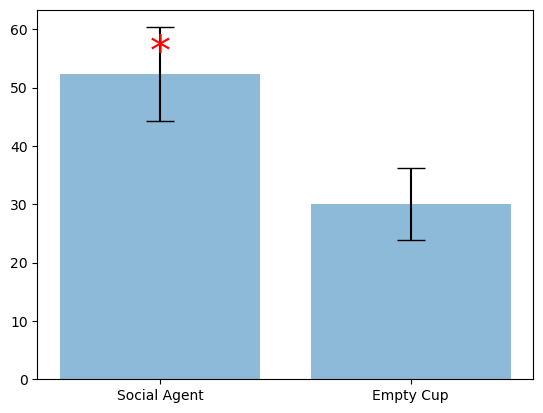

In [310]:
# Create the bar plot
plt.bar(x, y, yerr=yerr, align='center', alpha=0.5, ecolor='black', capsize=10)
plt.xticks(x, labels)
social_agent = soc.loc[:, 'social_agent' ]  # Values from the first column
empty_cup = soc.loc[:, 'empty_cup']  # Values from the second column
x_values = [1, 2]  # x values for each row

# Add significance markers
plt.text(x[0], y[0] + 0.05, "*", ha='center', va='bottom', color='red', fontsize=30)
# Adjust the position (e.g., +0.05) and font size as needed

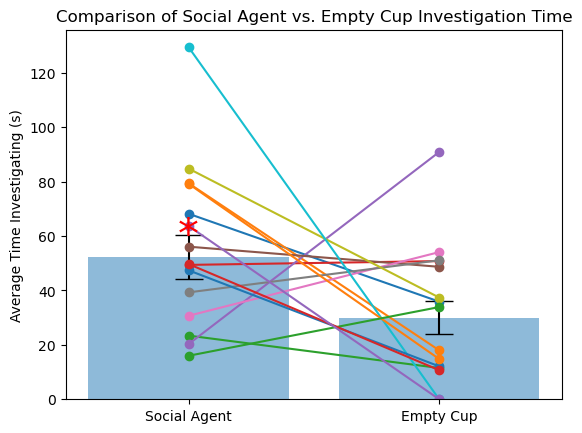

In [311]:
# Create the bar plot
plt.bar(x, y, yerr=yerr, align='center', alpha=0.5, ecolor='black', capsize=10)
plt.xticks(x, labels)
social_agent = soc.loc[:, 'social_agent' ]  # Values from the first column
empty_cup = soc.loc[:, 'empty_cup']  # Values from the second column
x_values = [1, 2]  # x values for each row

# Add significance markers
plt.text(x[0], y[0] + 0.05, "*", ha='center', va='bottom', color='red', fontsize=30)
# Adjust the position (e.g., +0.05) and font size as needed


# Plot each row as a separate line
# for i in range(len(combined_df)): Iterate over each index (row) in the combined DataFrame (combined_df) using a for loop.
# The loop iterates over a range of indices from 0 to the length of the DataFrame minus 1.
# It allows access to each row of the DataFrame, one at a time, with the variable i representing the index.
# plt.plot(x_values, [social_agent[i], empty_cup[i]], marker='o', label=f'Line {i+1}'): Plot a point for each time point (x_values) with corresponding values from the social_agent and empty_cup arrays.
# Each point is marked with a circular marker ('o').
# The label for each line is generated dynamically using the index (i+1) to represent different lines.

for i in range(len(soc)-1):
    plt.plot(x_values, [social_agent[i], empty_cup[i]], marker='o', label=f'Line {i+1}')
plt.ylabel('Average Time Investigating (s)')
plt.title('Comparison of Social Agent vs. Empty Cup Investigation Time')
plt.show()


In [312]:
# prompt: now i want to filter my combind_df based on the Animal notes column 

# Filter the soc based on the Animal notes column
cagemates = soc[soc['Animal notes'] == 'Cagemate']
familiar = soc[soc['Animal notes'] == 'Familiar']

# Perform t-tests comparing cagemate vs. empty and familiar vs. empty
t_stat_cagemate, p_value_cagemate = ttest_ind(cagemates['social_agent'], cagemates['empty_cup'])
t_stat_familiar, p_value_familiar = ttest_ind(familiar['social_agent'], familiar['empty_cup'])

# Print the results
print("Cagemate vs. Empty:")
print("t-statistic:", t_stat_cagemate)
print("p-value:", p_value_cagemate)

print("\nFamiliar vs. Empty:")
print("t-statistic:", t_stat_familiar)
print("p-value:", p_value_familiar)


Cagemate vs. Empty:
t-statistic: 0.4833133544720802
p-value: 0.6363445456770658

Familiar vs. Empty:
t-statistic: 2.75991569824763
p-value: 0.015343254212607405


In [313]:
# prompt: i want to calculate the mean of cagemates and familiar

# Calculate the mean of cagemates
cagemate_mean = cagemates['social_agent'].mean()

# Calculate the mean of familiar
familiar_mean = familiar['social_agent'].mean()

# Print the results
print("Cagemate mean:", cagemate_mean)
print("Familiar mean:", familiar_mean)

cagemate_sem = cagemates['social_agent'].sem()
familiar_sem = familiar['social_agent'].sem()

print('cagemate sem', cagemate_sem)
print('familiar sem', familiar_sem)

Cagemate mean: 40.25
Familiar mean: 64.375
cagemate sem 9.543902316587875
familiar sem 11.9626912583606


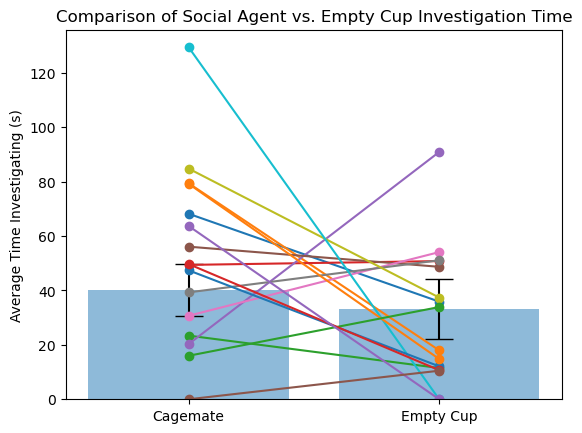

In [314]:
# Prepare data for bar plot
x = np.array([1, 2])
y = np.array([cagemate_mean, cagemates['empty_cup'].mean()])
yerr = np.array([cagemate_sem, cagemates['empty_cup'].sem()])
labels = ['Cagemate', 'Empty Cup']

# Create the bar plot
plt.bar(x, y, yerr=yerr, align='center', alpha=0.5, ecolor='black', capsize=10)
plt.xticks(x, labels)

# Add title and labels
plt.ylabel('Average Time Investigating (s)')
plt.title('Comparison of Cagemate vs. Empty Cup Investigation Time')

for i in range(len(soc)):
    plt.plot(x_values, [social_agent[i], empty_cup[i]], marker='o', label=f'Line {i+1}')
plt.ylabel('Average Time Investigating (s)')
plt.title('Comparison of Social Agent vs. Empty Cup Investigation Time')
plt.show()
# Show the plot
plt.show()


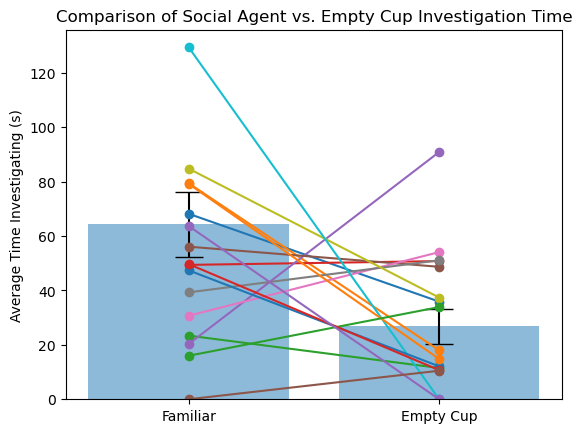

In [315]:
# Prepare data for bar plot
x = np.array([1, 2])
y = np.array([familiar_mean, familiar['empty_cup'].mean()])
yerr = np.array([familiar_sem, familiar['empty_cup'].sem()])
labels = ['Familiar', 'Empty Cup']

# Create the bar plot
plt.bar(x, y, yerr=yerr, align='center', alpha=0.5, ecolor='black', capsize=10)
plt.xticks(x, labels)

# Add title and labels
plt.ylabel('Average Time Investigating (s)')
plt.title('Comparison of Familiar vs. Empty Cup Investigation Time')
for i in range(len(soc)):
    plt.plot(x_values, [social_agent[i], empty_cup[i]], marker='o', label=f'Line {i+1}')
plt.ylabel('Average Time Investigating (s)')
plt.title('Comparison of Social Agent vs. Empty Cup Investigation Time')
plt.show()
# Show the plot
plt.show()


# Novelty preference analysis

**One way to read the data into python**

In [329]:
# Read in the first CSV file
df1 = pd.read_csv('D:\\Sequioa\\anymaze_data\\SM\\cage_1_SM_day_1_3.csv')  # Replace "path_to_your_first_csv_file.csv" with the actual path

# Read in the second CSV file
df2 = pd.read_csv('D:\\Sequioa\\anymaze_data\\SM\\cage_2_SM_day_2_4.csv')  # Replace "path_to_your_second_csv_file.csv" with the actual path

# Rename columns in the first dataframe
df1 = df1.rename(columns={
    'Novel-Right : time investigating (s)': 'Novel',
    'Familiar-Left : time investigating (s)': 'Familiar'
})

# Rename columns in the second dataframe
df2 = df2.rename(columns={
    'Novel Left : time investigating (s)': 'Novel',
    'Familiar Right : time investigating (s)': 'Familiar'
})

# Concatenate the dataframes
sm_df = pd.concat([df1, df2])

# Reset the index
sm_df = combined_df.reset_index(drop=True)

# Print the combined dataframe
print(combined_df)


    Test Animal Animal notes Segment of test  \
0      1  1.1.1     familiar   0 - 300 secs.   
1      2  1.3.1     cagemate   0 - 300 secs.   
2      3  1.1.3     cagemate   0 - 300 secs.   
3      4  1.2.3     cagemate   0 - 300 secs.   
4      5  1.3.3     familiar   0 - 300 secs.   
5      6  1.4.1     cagemate   0 - 300 secs.   
6      7  1.2.1     familiar   0 - 300 secs.   
7      8  1.4.3     familiar   0 - 300 secs.   
8      1  2.1.2      cagmate   0 - 300 secs.   
9      2  2.4.2     familiar   0 - 300 secs.   
10     3  2.1.4     familiar   0 - 300 secs.   
11     4  2.2.4     familiar   0 - 300 secs.   
12     5  2.3.4      cagmate   0 - 300 secs.   
13     6  2.4.4      cagmate   0 - 300 secs.   
14     7  2.2.2      cagmate   0 - 300 secs.   
15     8  2.3.2     familiar   0 - 300 secs.   

    Novel-Right : time investigating (s)  \
0                                   66.3   
1                                   56.5   
2                                  134.9   
3      

In [331]:
sm_df


,Test,Animal,Animal notes,Segment of test,Novel-Right : time investigating (s),Familiar-Left : time investigating (s),Whole-Chamber : time (s),Whole Left Chamber : time (s),Whole Right Chamber : time (s),Familiar Right : time investigating (s),Novel Left : time investigating (s)
0,1,1.1.1,familiar,0 - 300 secs.,66.3,51.2,248.5,83.1,100.6,NaN,NaN
1,2,1.3.1,cagemate,0 - 300 secs.,56.5,28.7,261.8,119.7,104.8,NaN,NaN
2,3,1.1.3,cagemate,0 - 300 secs.,134.9,8.2,256.3,27.8,182.5,NaN,NaN
3,4,1.2.3,cagemate,0 - 300 secs.,80.1,22.9,276.9,55.6,188.2,NaN,NaN
4,5,1.3.3,familiar,0 - 300 secs.,62.9,13.4,265.3,41.0,173.0,NaN,NaN
5,6,1.4.1,cagemate,0 - 300 secs.,90.4,13.1,265.9,36.7,176.8,NaN,NaN
6,7,1.2.1,familiar,0 - 300 secs.,40.4,34.4,261.9,83.8,110.1,NaN,NaN
7,8,1.4.3,familiar,0 - 300 secs.,106.4,22.3,248.4,44.1,151.2,NaN,NaN
8,1,2.1.2,cagmate,0 - 300 secs.,NaN,NaN,265.8,101.5,118.4,22.0,48.1
9,2,2.4.2,familiar,0 - 300 secs.,NaN,NaN,271.6,67.6,122.4,31.5,24.4


In [325]:
# Set the path to the folder containing your Excel files
folder_path = glob.glob(r"D:\Sequioa\anymaze_data\SM\cage*.csv")

In [326]:
folder_path

['D:\\Sequioa\\anymaze_data\\SM\\cage_1_SM_day_1_3.csv',
 'D:\\Sequioa\\anymaze_data\\SM\\cage_2_SM_day_2_4.csv']

In [330]:
# Initialize an empty list to store t-test results
t_test_results = [] 
#Perform t-test comparing columns E and F
t_stat, p_value = ttest_ind(sm_df['social_agent'], sm['novel'])

KeyError: 'social_agent'

In [ ]:
import pandas as pd

# Path to the directory containing the CSV files
directory_path = r'D:\Sequioa\anymaze_data\SM'



In [ ]:
# List to store DataFrames read from each CSV file
dataframes = []

# Loop through each CSV file in the directory
for file_name in ['cage_2_SM_day_2_4.csv', 'cage_1_SM_day_1_3.csv']:  # Update with your actual file names
    file_path = os.path.join(directory_path, file_name)
    
    # Read the CSV file and append the DataFrame to the list
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Combine the DataFrames into one DataFrame
combined_df = pd.concat(dataframes, ignore_index=True)

# Now combined_df contains the combined data from both CSV files


In [ ]:
str(file_name)
str(file_path)

'D:\\Sequioa\\anymaze_data\\SM\\cage_1_SM_day_1_3.csv'

In [ ]:
dataframes

[   Test Animal  Animal notes Segment of test  \
 0     1  2.1.2           NaN   0 - 300 secs.   
 1     2  2.4.2           NaN   0 - 300 secs.   
 2     3  2.1.4           NaN   0 - 300 secs.   
 3     4  2.2.4           NaN   0 - 300 secs.   
 4     5  2.3.4           NaN   0 - 300 secs.   
 5     6  2.4.4           NaN   0 - 300 secs.   
 6     7  2.2.2           NaN   0 - 300 secs.   
 7     8  2.3.2           NaN   0 - 300 secs.   
 
    Familiar Right : time investigating (s)  \
 0                                     22.0   
 1                                     31.5   
 2                                     26.2   
 3                                     18.1   
 4                                     10.3   
 5                                     21.2   
 6                                     59.2   
 7                                     26.2   
 
    Novel Left : time investigating (s)  Whole-Chamber : time (s)  \
 0                                 48.1                     265

In [ ]:
import pandas as pd

# Path to the directory containing the CSV files
directory_path = r'D:\Sequioa\anymaze_data\SM'

# List to store DataFrames read from each CSV file
dataframes = []

# Loop through each CSV file in the directory
for file_name in ['cage_2_SM_day_2_4.csv', 'cage_1_SM_day_1_3.csv']:  # Update with your actual file names
    file_path = os.path.join(directory_path, file_name)
    
    # Read the CSV file and append the DataFrame to the list
    df = pd.read_csv(file_path)
    dataframes.append(df)



In [ ]:
df

,Test,Animal,Animal notes,Segment of test,Novel-Right : time investigating (s),Familiar-Left : time investigating (s),Whole-Chamber : time (s),Whole Left Chamber : time (s),Whole Right Chamber : time (s)
0,1,1.1.1,NaN,0 - 300 secs.,66.3,51.2,248.5,83.1,100.6
1,2,1.3.1,NaN,0 - 300 secs.,56.5,28.7,261.8,119.7,104.8
2,3,1.1.3,NaN,0 - 300 secs.,134.9,8.2,256.3,27.8,182.5
3,4,1.2.3,NaN,0 - 300 secs.,80.1,22.9,276.9,55.6,188.2
4,5,1.3.3,NaN,0 - 300 secs.,62.9,13.4,265.3,41.0,173.0
5,6,1.4.1,NaN,0 - 300 secs.,90.4,13.1,265.9,36.7,176.8
6,7,1.2.1,NaN,0 - 300 secs.,40.4,34.4,261.9,83.8,110.1
7,8,1.4.3,NaN,0 - 300 secs.,106.4,22.3,248.4,44.1,151.2


In [ ]:
import pandas as pd
import os

# Path to the directory containing the CSV files
directory_path = r'D:\Sequioa\anymaze_data\SM'

# List to store DataFrames read from each CSV file
dataframes = []

# Loop through each CSV file in the directory
for file_path in ['cage_2_SM_day_2_4.csv', 'cage_1_SM_day_1_3.csv']:  # Update with your actual file names
    file_path = os.path.join(directory_path, file_name)
    
    # Read the CSV file and append the DataFrame to the list
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Concatenate the DataFrames into one DataFrame column-wise
combined_df = pd.concat(dataframes, axis=1)

# Now combined_df contains the combined data from both CSV files column-wise

NameError: name 'file_name' is not defined

In [ ]:
str(df)
str(file_name)

'cage_1_SM_day_1_3.csv'